# <ins>Workshop 2</ins>: 

# Regression in a Practical Example

* **Regression**: Learn about the supervised learning method used for predicting continuous values, such as prices or temperatures, based on previous data. This section will cover various regression techniques, including linear and logistic regression, and their applications in real-world scenarios.

<img src="https://media.licdn.com/dms/image/D4D12AQHPT_P41W-1Bg/article-cover_image-shrink_720_1280/0/1656047704655?e=2147483647&v=beta&t=xPmcSZOcdbrTGS1iDBEMmGvMRXj51XcEJ86JD_znlOM" width="500" height="315" alt="Description of the image">

**<ins>Material generated by:</ins>** 
- Martina Cádiz Leyton
- Daniel Moreno Cartagena<br>

*Date: 06-11-2024*

---
---

This workshop will include a detailed discussion on the foundational concepts of regression and time series analysis. It aims to provide participants with the tools necessary to handle, analyze, and predict data effectively.

<ins>**Library for Regression**</ins>

- **Scikit-learn**: Comprehensive library for machine learning, including robust tools for regression analysis.


In [ ]:
!pip install scikit-learn==1.4

# Regression

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

# Load dataset
california = fetch_california_housing()
california


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [18]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [19]:
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target
data


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


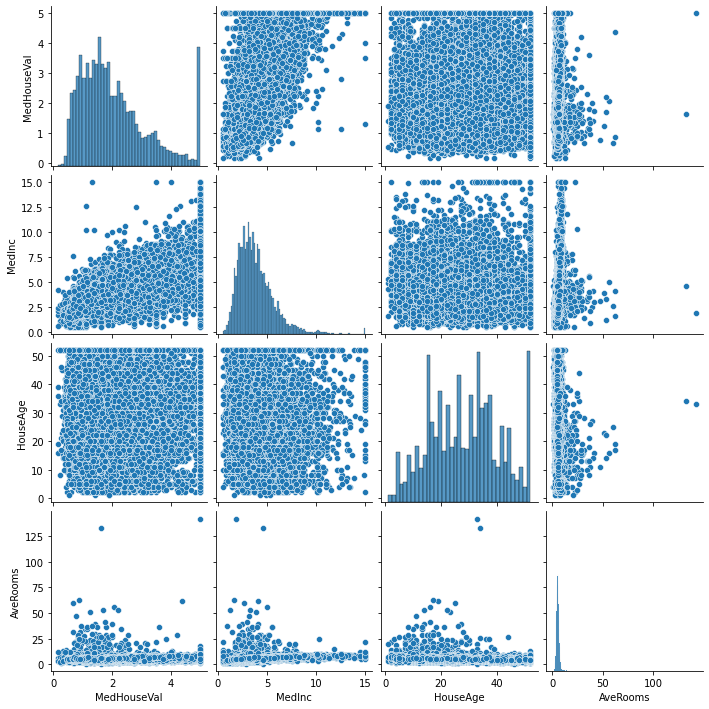

In [76]:
# Data exploration
sns.pairplot(data[['MedHouseVal', 'MedInc', 'HouseAge', 'AveRooms']])
plt.show()

In [77]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

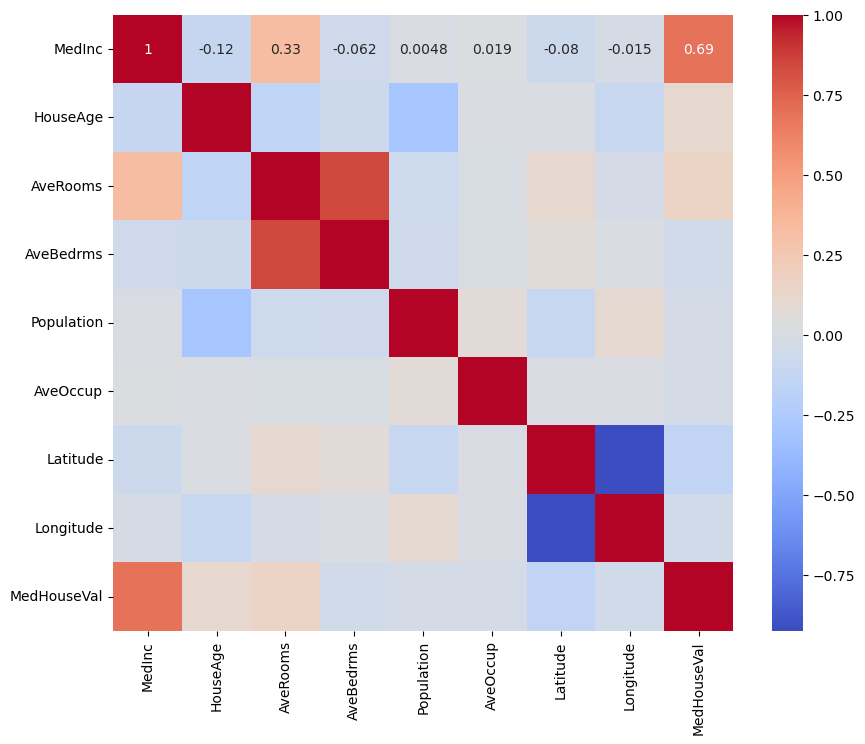

In [20]:
# Correlation matrix
corr_matrix = data.corr()

# Set the size of the figure
plt.figure(figsize=(10, 8))  # You can adjust the dimensions as needed

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
# Data splitting
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print()
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (16512, 8)
y_train shape: (16512,)

X_val shape: (4128, 8)
y_val shape: (4128,)


In [22]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [23]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 16512, dtype: float64

In [81]:
# Model training
model = LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression()

In [25]:
X_train.values.shape

(16512, 8)

In [82]:
# Predictions
y_pred = model.predict(X_val.values)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [83]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print('Root Mean Squared Error:', rmse)
print('R² score:', r2)

Root Mean Squared Error: 0.7455813830127763
R² score: 0.575787706032451


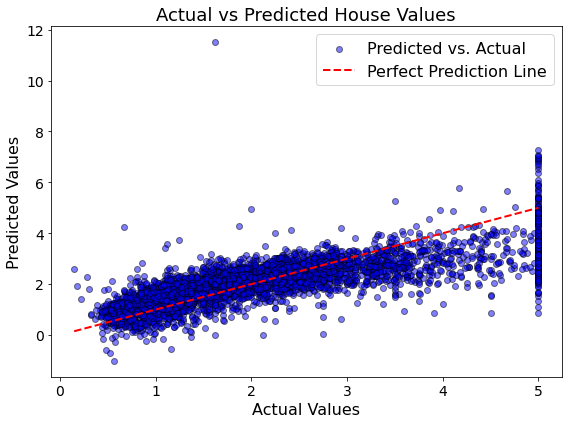

In [87]:
fs = 16

# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))  # Increase the plot size
plt.scatter(y_val, y_pred, color='blue', alpha=0.5, edgecolor='k', label='Predicted vs. Actual')  # Better color and transparency
plt.xlabel('Actual Values', fontsize=fs)  # Increase font size for x-label
plt.ylabel('Predicted Values', fontsize=fs)  # Increase font size for y-label
plt.title('Actual vs Predicted House Values', fontsize=fs+2)  # Increase font size for title

# Add a line for perfect predictions
min_val, max_val = min(y_val), max(y_val)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add a legend with increased font size
plt.legend(fontsize=fs)

# Adjust the tick parameters for both axes to increase the font size
plt.xticks(fontsize=fs-2)
plt.yticks(fontsize=fs-2)

# Make layout tighter
plt.tight_layout()

# Show the plot
plt.show()

# Practical Example: An Action-Oriented Analysis of Bike Station Performance (cont.)

In urban environments, shared bike services provide a flexible transportation option that complements public transit and reduces traffic congestion. However, managing such a service efficiently requires deep insights into usage patterns and station performance. This project aims to harness the power of big data analytics to enhance the operational efficiency and customer satisfaction of a shared bike system.

Using a comprehensive dataset spanning two years of operations in a major city, this analysis will focus on evaluating the performance of bike rental stations. The data includes timestamps of rentals and returns, station identifiers, event types (rental or return), bike IDs, and user types (subscriber or casual customer). This rich dataset will allow us to uncover critical usage patterns and station performance metrics.

<img src="https://media.istockphoto.com/id/1199831184/vector/public-city-bicycle-sharing-business-vector-flat-illustration-modern-automated-bike-rental.jpg?s=612x612&w=0&k=20&c=Ln20cn_A_xHqJ56iNBhbN8PEXl1ZBal5cwGpfbyWo2Q=" alt="Description of the image">

**Dataset characteristics:**

- datetime: hourly date + timestamp  
- season:  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday: whether the day is considered a holiday
- workingday: whether the day is neither a weekend nor holiday
- weather: 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp: temperature in Celsius
- atemp: "feels like" temperature in Celsius
- humidity: relative humidity
- windspeed: wind speed
- casual: number of non-registered user rentals initiated
- registered: number of registered user rentals initiated
- count: number of total rentals

## Objectives

* **Predict Total Hourly Rentals:** Predict the total number of bikes rented during each hour of the test set, using only information available prior to the rental period. This will enable us to anticipate demand and adjust services proactively.
* **Actionable Insights:** The final phase will focus on translating analytical findings into strategic actions. This could involve adjusting bike distribution strategies, enhancing station maintenance schedules, and creating targeted marketing campaigns for different user groups.

## Modeling

1. Split the data into training and test sets as specified (use the first 19 days for training and the period from the 20th to the end of the month for testing).
2. What features will we use to predict the total number of rented bicycles?
3. What is the target variable that we need to predict?
4. Split the training sets data into training and validation sets.
5. Select and train appropriate machine learning models such as linear regression, decision trees, or more advanced models like random forests or gradient boosting to predict total bicycle rentals.
6. Evaluate the models using suitable metrics such as RMSE (Root Mean Square Error), MAE (Mean Absolute Error), or RMSLE (Root Mean Squared Logarithmic Error).

In [72]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# We will add new libraries
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_log_error

### 1. Split the data into training and test sets as specified (use the first 19 days for training and the period from the 20th to the end of the month for testing).

This was already done by the challenge.

In [2]:
data_train = pd.read_csv('dataset/train.csv')
data_test = pd.read_csv('dataset/test.csv')

data_train['datetime'] = pd.to_datetime(data_train['datetime'])
data_test['datetime'] = pd.to_datetime(data_test['datetime'])

display(data_train.head())
display(data_test.head())

print(data_train.shape)
print(data_test.shape)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


(10886, 12)
(6493, 9)


### 2. What features will we use to predict the total number of rented bicycles?

We will use the features that we have in the test set columns

In [3]:
features = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed"]

### 3. What is the target variable that we need to predict?

Predict the total number of bikes rented during each hour of the test set.

In [4]:
col_label = 'count'

### 4. Split the training sets data into training and validation sets.

In [5]:
X_train = data_train[features]
y_train = data_train[col_label]

X_test = data_test[features]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print()
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')
print()
print(f'X_test shape: {X_test.shape}')

X_train shape: (8708, 8)
y_train shape: (8708,)

X_val shape: (2178, 8)
y_val shape: (2178,)

X_test shape: (6493, 8)


### 5. Select and train appropriate machine learning models such as linear regression, decision trees, or more advanced models like random forests or gradient boosting to predict total bicycle rentals.

In [6]:
dict_save_models_result = dict()

In this case, we will use the models discussed in class.

**K-Neighbors Regressor**

In [7]:
y_log_train = np.log1p(y_train)

knr = KNeighborsRegressor()
knr.fit(X_train, y_log_train)  # Fit on the transformed data
y_preds_log = knr.predict(X_val)  # Predictions are on the log scale

# Reverse the transformation
y_pred = np.expm1(y_preds_log)  # Inverse of np.log1p

rmsle = root_mean_squared_log_error(y_val, y_pred)
dict_save_models_result['KNR'] = {
    'model': knr,
    'rmsle': rmsle,
}
print('RMSLE Value For K-Neighbors Regressor:', rmsle)

RMSLE Value For K-Neighbors Regressor: 1.2542115495673205


**Linear Regression**

In [9]:
y_log_train = np.log1p(y_train)

lr = LinearRegression()
lr.fit(X_train, y_log_train)  # Fit on the transformed data
y_preds_log = lr.predict(X_val)  # Predictions are on the log scale

# Reverse the transformation
y_pred = np.expm1(y_preds_log)  # Inverse of np.log1p

rmsle = root_mean_squared_log_error(y_val, y_pred)
dict_save_models_result['LR'] = {
    'model': lr,
    'rmsle': rmsle,
}
print('RMSLE Value For Linear Regression:', rmsle)

RMSLE Value For Linear Regression: 1.2312538634900543


**Random Forest Regressor**

In [11]:
y_log_train = np.log1p(y_train)

rfr = RandomForestRegressor(random_state=2)
rfr.fit(X_train, y_log_train)  # Fit on the transformed data
y_preds_log = rfr.predict(X_val)  # Predictions are on the log scale

# Reverse the transformation
y_pred = np.expm1(y_preds_log)  # Inverse of np.log1p

rmsle = root_mean_squared_log_error(y_val, y_pred)
dict_save_models_result['RFR'] = {
    'model': rfr,
    'rmsle': rmsle,
}
print('RMSLE Value For Random Forest Regressor:', rmsle)

RMSLE Value For Random Forest Regressor: 1.18812751173219


**Results comparison**

In [12]:
dict_save_models_result

{'KNR': {'model': KNeighborsRegressor(), 'rmsle': 1.2542115495673205},
 'LR': {'model': LinearRegression(), 'rmsle': 1.2312538634900543},
 'RFR': {'model': RandomForestRegressor(random_state=2),
  'rmsle': 1.18812751173219}}

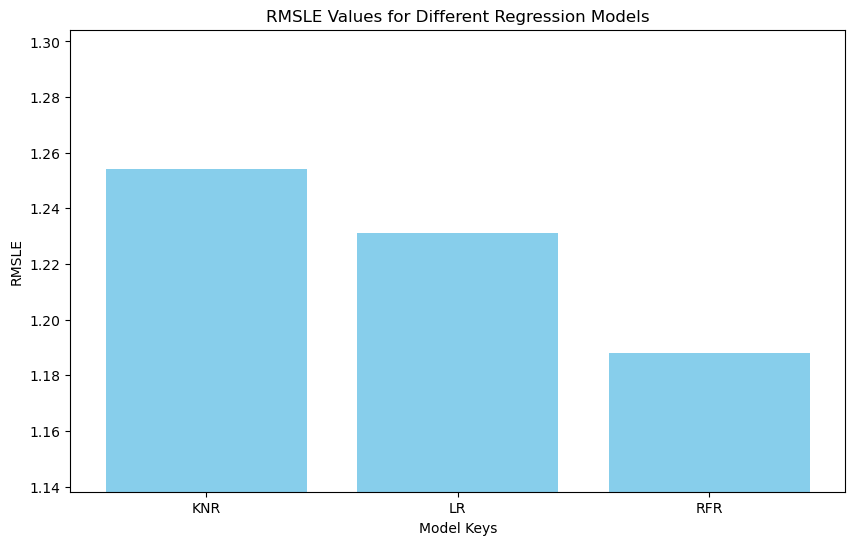

In [13]:
keys = list(dict_save_models_result.keys())
rmsle_values = [dict_save_models_result[key]['rmsle'] for key in keys]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(keys, rmsle_values, color='skyblue')
plt.xlabel('Model Keys')
plt.ylabel('RMSLE')
plt.title('RMSLE Values for Different Regression Models')
plt.xticks(keys)  # Set model keys as x-ticks
plt.ylim(min(rmsle_values) - 0.05, max(rmsle_values) + 0.05)  # Optional: Adjust y-axis limits for better visualization
plt.show()

### (To Do) Note that a hyperparameter search should be conducted to determine the best model. However what else can we do without searching hyperparameters?

Answer 1: We could consider adding the datetime to the model. However, this variable cannot be directly aggregated into the model.

**Why can't we directly aggregate the datetime variable?**

Answer 2:

In the context of machine learning and statistical models, you cannot directly include a datetime variable for several reasons:

* <ins>Non-numeric format:</ins> Most machine learning and statistical models require data in a numeric format to perform calculations. Dates and times are usually in formats that include both numbers and characters (such as days, months, and years), which are not directly interpretable by algorithms.

* <ins>No clear mathematical meaning:</ins> Mathematical operations such as addition or multiplication do not have a clear meaning when applied directly to dates and times. For example, what would it mean to add two dates together?


**What can we do to incorporate this variable into the model?**

Answer 3:

For these reasons, it's common to preprocess datetime variables before using them in a model. Some preprocessing techniques include:

* <ins>Decomposition:</ins> Breaking down the date and time into individual components such as year, month, day, hour, minute, and second.
* <ins>Cyclical encoding:</ins> Transforming features like month or time of day into two dimensions using trigonometric functions to capture the cyclic nature (e.g., after December comes January, or after 23:00 comes 00:00).
* <ins>Time intervals:</ins> Calculating the difference between dates to use the duration of intervals as a numeric feature.

In [52]:
data_train_dates = data_train.copy()
data_train_dates['datetime'] = pd.to_datetime(data_train_dates['datetime'])
data_train_dates['year'] = data_train['datetime'].dt.year
data_train_dates['month'] = data_train['datetime'].dt.month
data_train_dates['weekday'] = data_train['datetime'].dt.weekday
data_train_dates['day'] = data_train['datetime'].dt.day
data_train_dates['hour'] = data_train['datetime'].dt.hour

data_test_dates = data_test.copy()
data_test_dates['datetime'] = pd.to_datetime(data_test_dates['datetime'])
data_test_dates['year'] = data_test['datetime'].dt.year
data_test_dates['month'] = data_test['datetime'].dt.month
data_test_dates['weekday'] = data_test['datetime'].dt.weekday
data_test_dates['day'] = data_test['datetime'].dt.day
data_test_dates['hour'] = data_test['datetime'].dt.hour

data_train_dates

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,5,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,5,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,5,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,2,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,2,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,2,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,2,19,22


### (To Do) So now, the idea is that you follow the same process as above to plot the results. This involves:

* Splitting the data into training and validation sets, **leaving the last 4 days of each month in the validation set.**
* Training the models.
  
**Note:** Save the results in the same dictionary that we used above, `dict_save_models_result`, but obviously, you should add keys with different names.

* Plotting the past and new results in terms of RMLSE.
* Try to visualize the predictions compared to the original values (use your best model).

**Splitting the data into training and validation sets.**

In [53]:
#features = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "year", "month", "weekday", "day", "hour"]
#col_label = 'count'
#
#X_train_dates = data_train_dates[features]
#y_train = data_train_dates[col_label]
#
#X_test_dates = data_test_dates[features]
#
#X_train_dates, X_val_dates, y_train, y_val = train_test_split(X_train_dates, y_train, test_size=0.2, random_state=0)
#
#print(f'X_train_dates shape: {X_train_dates.shape}')
#print(f'y_train shape: {y_train.shape}')
#print()
#print(f'X_val_dates shape: {X_val_dates.shape}')
#print(f'y_val shape: {y_val.shape}')
#print()
#print(f'X_test_dates shape: {X_test_dates.shape}')

In [76]:
data_train_dates

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,day,hour,last_day,is_validation
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,5,1,0,2011-01-19 23:00:00,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,5,1,1,2011-01-19 23:00:00,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,5,1,2,2011-01-19 23:00:00,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,5,1,3,2011-01-19 23:00:00,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,5,1,4,2011-01-19 23:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,2,19,19,2012-12-19 23:00:00,True
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,2,19,20,2012-12-19 23:00:00,True
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,2,19,21,2012-12-19 23:00:00,True
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,2,19,22,2012-12-19 23:00:00,True


In [75]:
features = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "year", "month", "weekday", "day", "hour"]
col_label = 'count'

# Encontrar el último día de cada mes en el DataFrame
data_train_dates['last_day'] = data_train_dates.groupby(['year', 'month'])['datetime'].transform('max')

# Determinar si cada fila pertenece a los últimos 3 días del mes
data_train_dates['is_validation'] = data_train_dates['datetime'] >= (data_train_dates['last_day'] - pd.Timedelta(days=4))

# Separar los conjuntos de datos
train_df = data_train_dates[data_train_dates['is_validation'] == False]
val_df = data_train_dates[data_train_dates['is_validation'] == True]

X_train_dates = train_df[features]
y_train = train_df[col_label]

X_val_dates = val_df[features]
y_val = val_df[col_label]

X_test_dates = data_test_dates[features]

print(f'X_train_dates shape: {X_train_dates.shape}')
print(f'y_train shape: {y_train.shape}')
print()
print(f'X_val_dates shape: {X_val_dates.shape}')
print(f'y_val shape: {y_val.shape}')
print()
print(f'X_test_dates shape: {X_test_dates.shape}')

X_train_dates shape: (8576, 13)
y_train shape: (8576,)

X_val_dates shape: (2310, 13)
y_val shape: (2310,)

X_test_dates shape: (6493, 13)


**Training the models.**

In [ ]:
y_log_train = np.log1p(y_train)

knr = KNeighborsRegressor()
knr.fit(X_train_dates, y_log_train)  # Fit on the transformed data
y_preds_log = knr.predict(X_val_dates)  # Predictions are on the log scale

# Reverse the transformation
y_pred = np.expm1(y_preds_log)  # Inverse of np.log1p

rmsle = root_mean_squared_log_error(y_val, y_pred)
dict_save_models_result['KNR_dates'] = {
    'model': knr,
    'rmsle': rmsle,
}
print('RMSLE Value For K-Neighbors Regressor:', rmsle)

In [55]:
y_log_train = np.log1p(y_train)

lr = LinearRegression()
lr.fit(X_train_dates, y_log_train)  # Fit on the transformed data
y_preds_log = lr.predict(X_val_dates)  # Predictions are on the log scale

# Reverse the transformation
y_pred = np.expm1(y_preds_log)  # Inverse of np.log1p

rmsle = root_mean_squared_log_error(y_val, y_pred)
dict_save_models_result['LR_dates'] = {
    'model': lr,
    'rmsle': rmsle,
}
print('RMSLE Value For Linear Regression:', rmsle)

RMSLE Value For Linear Regression: 1.0306548443732604


In [56]:
y_log_train = np.log1p(y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train_dates, y_log_train)  # Fit on the transformed data
y_preds_log = rfr.predict(X_val_dates)  # Predictions are on the log scale

# Reverse the transformation
y_pred = np.expm1(y_preds_log)  # Inverse of np.log1p

rmsle = root_mean_squared_log_error(y_val, y_pred)
dict_save_models_result['RFR_dates'] = {
    'model': rfr,
    'rmsle': rmsle,
}
print('RMSLE Value For Random Forest Regressor:', rmsle)

RMSLE Value For Random Forest Regressor: 0.3384308852170376


**Plotting the results in terms of RMLSE.**

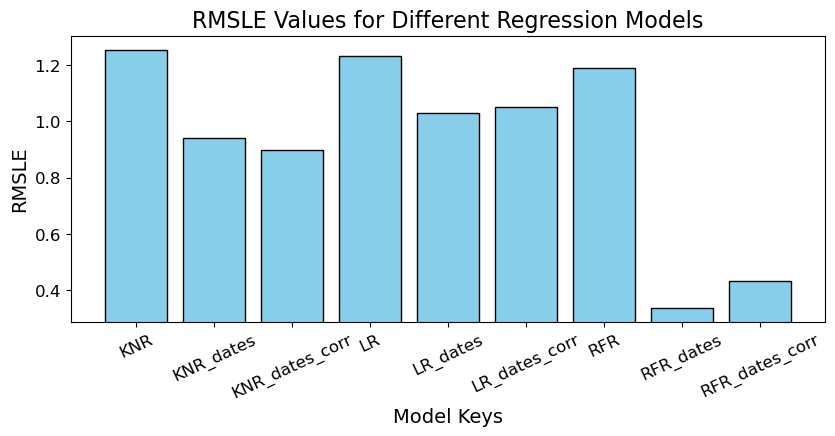

In [84]:
myKeys = list(dict_save_models_result.keys())
myKeys.sort()
sorted_dict_results = {i: dict_save_models_result[i] for i in myKeys}

keys = list(sorted_dict_results.keys())
rmsle_values = [sorted_dict_results[key]['rmsle'] for key in keys]

# Creating the bar plot with improved aesthetics
plt.figure(figsize=(9, 5))
plt.bar(keys, rmsle_values, color='skyblue', edgecolor='black')  # Added edge color for better distinction
plt.xlabel('Model Keys', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('RMSLE', fontsize=14)  # Increase font size for y-axis label
plt.title('RMSLE Values for Different Regression Models', fontsize=16)  # Increase font size for title
plt.xticks(keys, rotation=25, fontsize=12)  # Increase font size for x-ticks and set rotation
plt.yticks(fontsize=12)  # Increase font size for y-ticks
plt.ylim(min(rmsle_values) - 0.05, max(rmsle_values) + 0.05)  # Adjust y-axis limits for better visualization
plt.tight_layout(pad=3.0)  # Add padding for the overall layout
plt.show()

Is that all we can do without searching for hyperparameters?

Answer: No, for example, we can observe the correlation among variables.

### How is the correlation among variables?

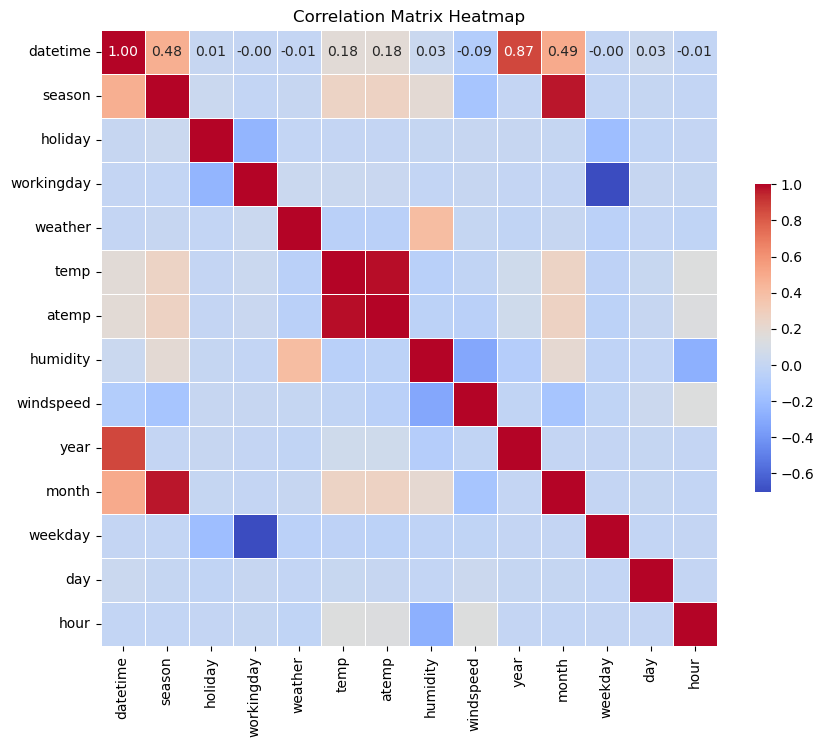

In [38]:
corr = data_train_dates.drop(['count', 'casual', 'registered', 'is_validation', 'last_day'], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title (optional)
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

We could remove the independent variables that have high correlations with each other.

In [39]:
# Calculate the correlation matrix
corr_abs = corr.abs()

# Select upper triangle of correlation matrix
upper = corr_abs.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print(f"Columns dropped: {to_drop}")

Columns dropped: ['atemp', 'year', 'month']


In [40]:
data_train_reduced = data_train_dates.drop(to_drop + ['datetime', 'casual', 'registered', 'count', 'is_validation', 'last_day'], axis=1)
data_train_reduced

,season,holiday,workingday,weather,temp,humidity,windspeed,weekday,day,hour
0,1,0,0,1,9.84,81,0.0000,5,1,0
1,1,0,0,1,9.02,80,0.0000,5,1,1
2,1,0,0,1,9.02,80,0.0000,5,1,2
3,1,0,0,1,9.84,75,0.0000,5,1,3
4,1,0,0,1,9.84,75,0.0000,5,1,4
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,2,19,19
10882,4,0,1,1,14.76,57,15.0013,2,19,20
10883,4,0,1,1,13.94,61,15.0013,2,19,21
10884,4,0,1,1,13.94,61,6.0032,2,19,22


In [41]:
X_train_dates_corr = train_df[data_train_reduced.columns]
y_train = train_df[col_label]

X_val_dates_corr = val_df[data_train_reduced.columns]
y_val = val_df[col_label]

X_test_dates_corr = data_test_dates[data_train_reduced.columns]

print(f'X_train_dates shape: {X_train_dates_corr.shape}')
print(f'y_train shape: {y_train.shape}')
print()
print(f'X_val_dates shape: {X_val_dates_corr.shape}')
print(f'y_val shape: {y_val.shape}')
print()
print(f'X_test_dates_corr shape: {X_test_dates_corr.shape}')

X_train_dates shape: (8576, 10)
y_train shape: (8576,)

X_val_dates shape: (2310, 10)
y_val shape: (2310,)

X_test_dates_corr shape: (6493, 10)


In [58]:
y_log_train = np.log1p(y_train)

knr = KNeighborsRegressor()
knr.fit(X_train_dates_corr, y_log_train)  # Fit on the transformed data
y_preds_log = knr.predict(X_val_dates_corr)  # Predictions are on the log scale

# Reverse the transformation
y_pred = np.expm1(y_preds_log)  # Inverse of np.log1p

rmsle = root_mean_squared_log_error(y_val, y_pred)
dict_save_models_result['KNR_dates_corr'] = {
    'model': knr,
    'rmsle': rmsle,
}
print('RMSLE Value For K-Neighbors Regressor:', rmsle)

RMSLE Value For K-Neighbors Regressor: 0.8974307630438042


In [59]:
y_log_train = np.log1p(y_train)

lr = LinearRegression()
lr.fit(X_train_dates_corr, y_log_train)  # Fit on the transformed data
y_preds_log = lr.predict(X_val_dates_corr)  # Predictions are on the log scale

# Reverse the transformation
y_pred = np.expm1(y_preds_log)  # Inverse of np.log1p

rmsle = root_mean_squared_log_error(y_val, y_pred)
dict_save_models_result['LR_dates_corr'] = {
    'model': lr,
    'rmsle': rmsle,
}
print('RMSLE Value For Linear Regression:', rmsle)

RMSLE Value For Linear Regression: 1.0509196664772178


In [60]:
y_log_train = np.log1p(y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train_dates_corr, y_log_train)  # Fit on the transformed data
y_preds_log = rfr.predict(X_val_dates_corr)  # Predictions are on the log scale

# Reverse the transformation
y_pred = np.expm1(y_preds_log)  # Inverse of np.log1p

rmsle = root_mean_squared_log_error(y_val, y_pred)
dict_save_models_result['RFR_dates_corr'] = {
    'model': rfr,
    'rmsle': rmsle,
}
print('RMSLE Value For Random Forest Regressor:', rmsle)

RMSLE Value For Random Forest Regressor: 0.4329303770557324


**Results comparison**

In [61]:
myKeys = list(dict_save_models_result.keys())
myKeys.sort()
sorted_dict_results = {i: dict_save_models_result[i] for i in myKeys}
sorted_dict_results

{'KNR': {'model': KNeighborsRegressor(), 'rmsle': 1.2542115495673205},
 'KNR_dates': {'model': KNeighborsRegressor(), 'rmsle': 0.9422741538144732},
 'KNR_dates_corr': {'model': KNeighborsRegressor(),
  'rmsle': 0.8974307630438042},
 'LR': {'model': LinearRegression(), 'rmsle': 1.2312538634900543},
 'LR_dates': {'model': LinearRegression(), 'rmsle': 1.0306548443732604},
 'LR_dates_corr': {'model': LinearRegression(), 'rmsle': 1.0509196664772178},
 'RFR': {'model': RandomForestRegressor(random_state=2),
  'rmsle': 1.18812751173219},
 'RFR_dates': {'model': RandomForestRegressor(), 'rmsle': 0.3384308852170376},
 'RFR_dates_corr': {'model': RandomForestRegressor(),
  'rmsle': 0.4329303770557324}}

In [62]:
keys = list(sorted_dict_results.keys())
rmsle_values = [sorted_dict_results[key]['rmsle'] for key in keys]

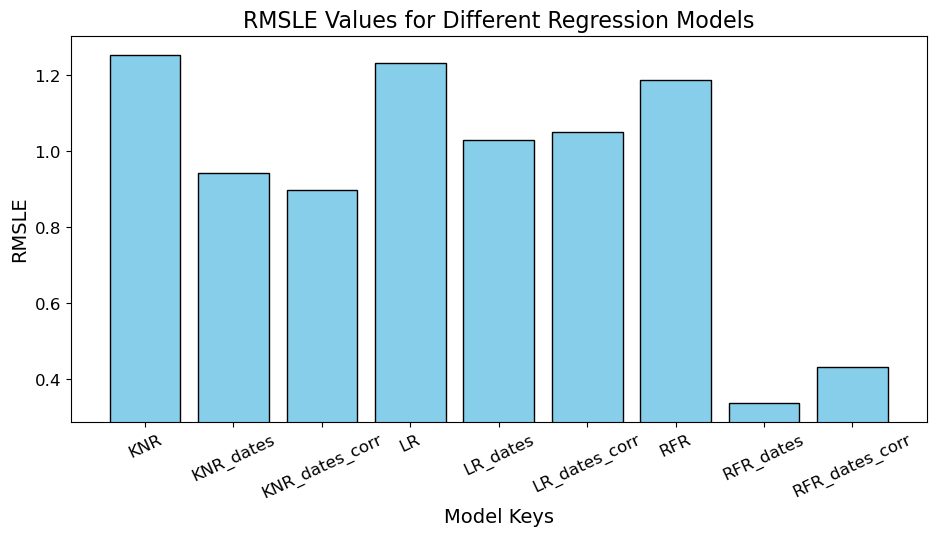

In [63]:
# Creating the bar plot with improved aesthetics
plt.figure(figsize=(10, 6))
plt.bar(keys, rmsle_values, color='skyblue', edgecolor='black')  # Added edge color for better distinction
plt.xlabel('Model Keys', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('RMSLE', fontsize=14)  # Increase font size for y-axis label
plt.title('RMSLE Values for Different Regression Models', fontsize=16)  # Increase font size for title
plt.xticks(keys, rotation=25, fontsize=12)  # Increase font size for x-ticks and set rotation
plt.yticks(fontsize=12)  # Increase font size for y-ticks
plt.ylim(min(rmsle_values) - 0.05, max(rmsle_values) + 0.05)  # Adjust y-axis limits for better visualization
plt.tight_layout(pad=3.0)  # Add padding for the overall layout
plt.show()

### (To Do) Now we should select the model with the lowest RMLSE.

How would we do this in Python, considering that you might have many models saved?

In [64]:
name_model = np.argmin(rmsle_values)
dict_save_models_result[keys[name_model]]['model']

RandomForestRegressor()

### (To Do) Try to visualize the predictions for the months of May, June, and July (5, 6, and 7 respectively) for 2012.

Compare the predictions to the original values in the same plot (using your best model). **Use the VALIDATION SET** for this, because **you cannot use the TEST SET**, since you don't have the original values.

In [65]:
y_log_train = np.log1p(y_train)

y_preds_log = dict_save_models_result[keys[name_model]]['model'].predict(X_val_dates)  # Predictions are on the log scale

# Reverse the transformation
y_val_pred = np.expm1(y_preds_log)  # Inverse of np.log1p
y_val_pred

array([ 28.55493464,  26.49821644,  24.03491145, ..., 196.74913228,
       160.63070441, 105.4593157 ])

C:\Users\56987\AppData\Local\Temp\ipykernel_448\2943659359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_dates.loc[:, 'datetime'] = pd.to_datetime(X_train_dates[['year', 'month', 'day', 'hour']])
C:\Users\56987\AppData\Local\Temp\ipykernel_448\2943659359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val_dates.loc[:, 'datetime'] = pd.to_datetime(X_val_dates[['year', 'month', 'day', 'hour']])


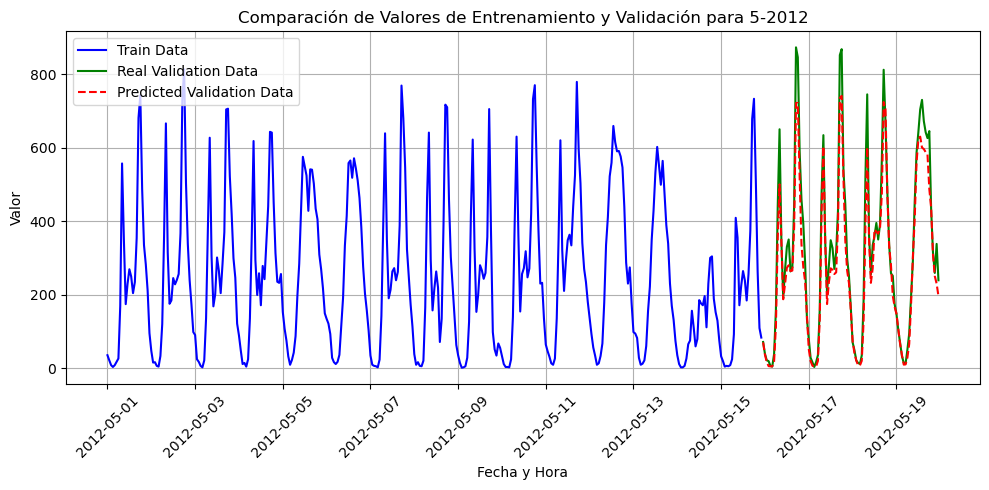

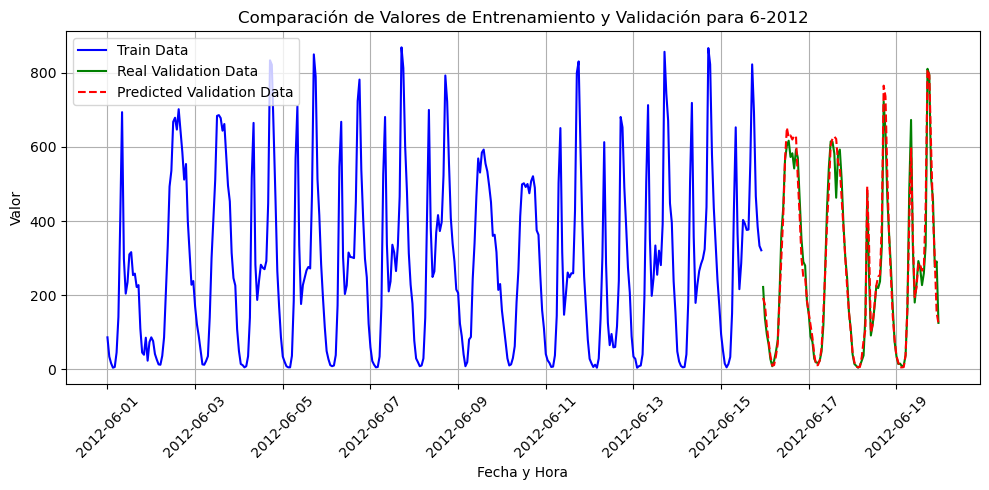

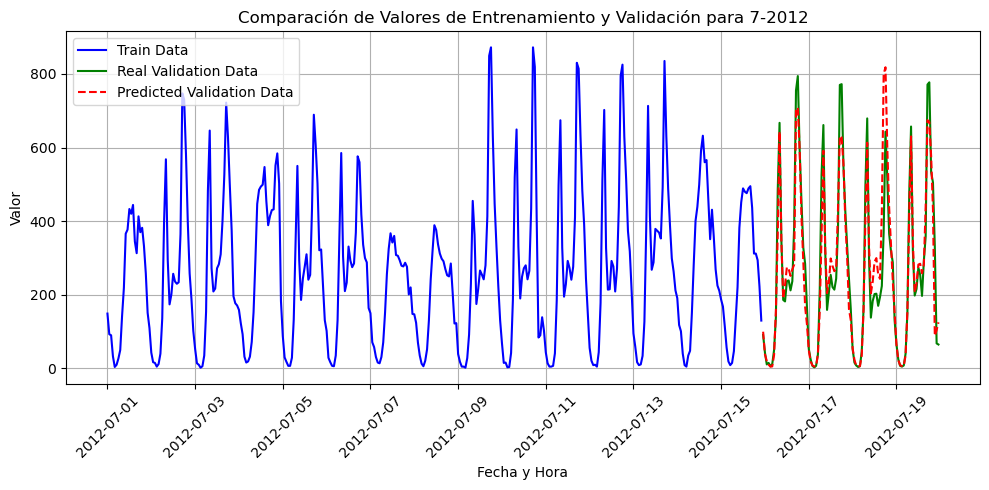

In [68]:
import warnings

# Convertir columnas de fecha y hora a datetime para ambos DataFrames usando .loc para evitar SettingWithCopyWarning
X_train_dates.loc[:, 'datetime'] = pd.to_datetime(X_train_dates[['year', 'month', 'day', 'hour']])
X_val_dates.loc[:, 'datetime'] = pd.to_datetime(X_val_dates[['year', 'month', 'day', 'hour']])

# Lista de meses para filtrar y año específico
months = [5, 6, 7]
year_filter = 2012

# Crear un gráfico para cada mes
for month in months:
    train_filter = (X_train_dates['month'] == month) & (X_train_dates['year'] == year_filter)
    val_filter = (X_val_dates['month'] == month) & (X_val_dates['year'] == year_filter)

    plt.figure(figsize=(10, 5))

    # Verificar que hay datos antes de graficar
    if any(train_filter):
        plt.plot(X_train_dates[train_filter]['datetime'], y_train[train_filter], label='Train Data', color='blue')
    if any(val_filter):
        plt.plot(X_val_dates[val_filter]['datetime'], y_val[val_filter], label='Real Validation Data', color='green')
        plt.plot(X_val_dates[val_filter]['datetime'], y_val_pred[val_filter], label='Predicted Validation Data', color='red', linestyle='--')

    plt.title(f'Comparación de Valores de Entrenamiento y Validación para {month}-{year_filter}')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Do the prediction in the test set.

In [69]:
y_log_train = np.log1p(y_train)

y_preds_log = dict_save_models_result[keys[name_model]]['model'].predict(X_test_dates)  # Predictions are on the log scale

# Reverse the transformation
y_test_pred = np.expm1(y_preds_log)  # Inverse of np.log1p
y_test_pred

array([ 12.08019259,   4.44905306,   2.99108537, ..., 153.20318993,
       115.15950138,  61.13062015])

**(To Do) Generate a CSV with the predicction. Use the sampleSubmission.csv as an example.**

In [70]:
sampleSubmission = pd.read_csv('./dataset/sampleSubmission.csv')
sampleSubmission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [71]:
submission = pd.DataFrame({
        "datetime": data_test_dates.datetime.values,
        "count": y_test_pred
    })

submission

,datetime,count
0,2011-01-20 00:00:00,12.080193
1,2011-01-20 01:00:00,4.449053
2,2011-01-20 02:00:00,2.991085
3,2011-01-20 03:00:00,3.050521
4,2011-01-20 04:00:00,2.504127
...,...,...
6488,2012-12-31 19:00:00,285.971841
6489,2012-12-31 20:00:00,203.106943
6490,2012-12-31 21:00:00,153.203190
6491,2012-12-31 22:00:00,115.159501


In [51]:
submission.to_csv('submission.csv', index=False)

### Actionable Insights

Based on the data analysis of the bike rental system, we can reach several useful conclusions that could inform specific actions to improve the bike company. Here are some potential actions based on different possible conclusions from the analysis:

#### From the data and visualization, we could derive actionable insights such as:

<ins>**1. Customization of Marketing and Promotions**</ins>

**Conclusion:** If we discover significant differences in rental behavior between registered and casual users, we can tailor marketing strategies.

**Action:** Create promotions specifically aimed at converting casual users into regular subscribers, or offer discounts during off-peak hours to increase usage.

<ins>**2. Adaptation to Weather Conditions**</ins>

**Conclusion:** The analysis may show a strong correlation between weather conditions and the demand for bikes.

**Action:** Offer promotions or incentives during adverse weather conditions to maintain usage levels. Additionally, improve the infrastructure of the stations to protect both the bikes and the users from the elements.

#### If we had the location and quantity of bicycles per station as features, we could generate actionable insights such as:

<ins>**3. Optimization of Fleet and Distribution**</ins>

**Conclusion:** If we identify that certain stations have demand peaks at specific times of the day or on particular days, we can optimize bike availability at those stations during those periods.

**Action:** Implement a dynamic bike redistribution system that responds in real time to observed demand patterns. This could include the use of redistribution vehicles or incentives for users to return bikes to stations with shortages.

<ins>**4. Urban Planning and Expansion**</ins>

**Conclusion:** If certain areas show consistent growth in bike usage, this may indicate an opportunity for expansion.

**Action:** Work in collaboration with local authorities to expand bike stations to new areas, based on demand data and service growth.

<ins>**5. Improvement of User Experience**</ins>

**Conclusion:** The analysis could identify specific factors affecting user satisfaction, such as wait times, bike availability, or issues with the user interface.

**Action:** Enhance the technology of the stations and the mobile app to facilitate the rental and return process. Invest in customer training and technical support to ensure a positive user experience.